# Mumbai Real Estate Price Prediction Model

## UNDERSTANDING THE DATA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [4]:
df = pd.read_csv('properties.csv', low_memory=False)
print(f" Dataset Shape: {df.shape}")
print(f" Total Columns: {df.shape[1]}")
print(f"🏠 Total Properties: {df.shape[0]}")

 Dataset Shape: (12685, 145)
 Total Columns: 145
🏠 Total Properties: 12685


In [7]:
print("\n📋 Dataset Info:")
print(df.info())

print(f"Price column dtype: {df['Price'].dtype}")
print(f"Unique price values: {df['Price'].nunique()}")
print(f"Sample price values:")
print(df['Price'].head(10))

print(f"\n🔍 Price Statistics:")
print(df['Price'].describe())


📋 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12685 entries, 0 to 12684
Columns: 145 entries, ID to Pantry Type
dtypes: float64(12), int64(93), object(40)
memory usage: 14.0+ MB
None
Price column dtype: float64
Unique price values: 1251
Sample price values:
0    3150000.0
1    6300000.0
2    5400000.0
3    9000000.0
4    4950000.0
5    6570000.0
6    5500000.0
7    4200000.0
8    3449000.0
9    5000000.0
Name: Price, dtype: float64

🔍 Price Statistics:
count    1.260100e+04
mean     2.640261e+07
std      3.653648e+08
min      1.000000e+05
25%      7.000000e+06
50%      1.350000e+07
75%      2.550000e+07
max      4.080000e+10
Name: Price, dtype: float64


### Since this is Real Estate data mainly the price will depend on Area,bedroom,bathroom,Carpet area,etc. 

In [8]:
# Analyze key features we identified
key_features = ['bedroom', 'Bathroom', 'Carpet Area', 'Area Name', 'Type of Property', 
                'furnished Type', 'Developer', 'Price']

In [9]:
for feature in key_features:
    if feature in df.columns:
        print(f"\n📊 {feature}:")
        print(f"   - Data Type: {df[feature].dtype}")
        print(f"   - Unique Values: {df[feature].nunique()}")
        print(f"   - Missing Values: {df[feature].isnull().sum()}")
        print(f"   - Sample Values: {df[feature].dropna().head(3).tolist()}")
    else:
        print(f"\n❌ {feature}: Column not found!")


📊 bedroom:
   - Data Type: int64
   - Unique Values: 6
   - Missing Values: 0
   - Sample Values: [1, 2, 2]

📊 Bathroom:
   - Data Type: float64
   - Unique Values: 8
   - Missing Values: 69
   - Sample Values: [2.0, 2.0, 2.0]

📊 Carpet Area:
   - Data Type: float64
   - Unique Values: 1186
   - Missing Values: 2552
   - Sample Values: [375.0, 579.0, 585.0]

📊 Area Name:
   - Data Type: object
   - Unique Values: 357
   - Missing Values: 0
   - Sample Values: ['Kalyan West', 'Kalyan West', 'Kalyan West']

📊 Type of Property:
   - Data Type: object
   - Unique Values: 5
   - Missing Values: 0
   - Sample Values: ['Apartment', 'Apartment', 'Apartment']

📊 furnished Type:
   - Data Type: object
   - Unique Values: 3
   - Missing Values: 77
   - Sample Values: ['Unfurnished', 'Unfurnished', 'Unfurnished']

📊 Developer:
   - Data Type: object
   - Unique Values: 942
   - Missing Values: 5679
   - Sample Values: ['TATA Housing Development Company Ltd.', 'Sai Satyam Developers', 'Birla Estat

### Missing Values

In [11]:
print("\n📊 Missing Values Summary:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
})
missing_summary = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Percentage', ascending=False)

print(f"Total columns with missing values: {len(missing_summary)}")
print(f"\nTop 10 columns with most missing values:")
print(missing_summary.head(10))


📊 Missing Values Summary:
Total columns with missing values: 41

Top 10 columns with most missing values:
                          Missing_Count  Missing_Percentage
Pantry Type                       12620           99.487584
Land Area / Covered Area          12601           99.337801
Land Area Unit                    12599           99.322034
Possession By                     12449           98.139535
NRI Pref                          10668           84.099330
Rera                              10310           81.277099
Availability Starts From           9602           75.695704
Property Uniqueness                8025           63.263697
balconies                          6923           54.576271
Units Available                    6550           51.635790


### PLOT

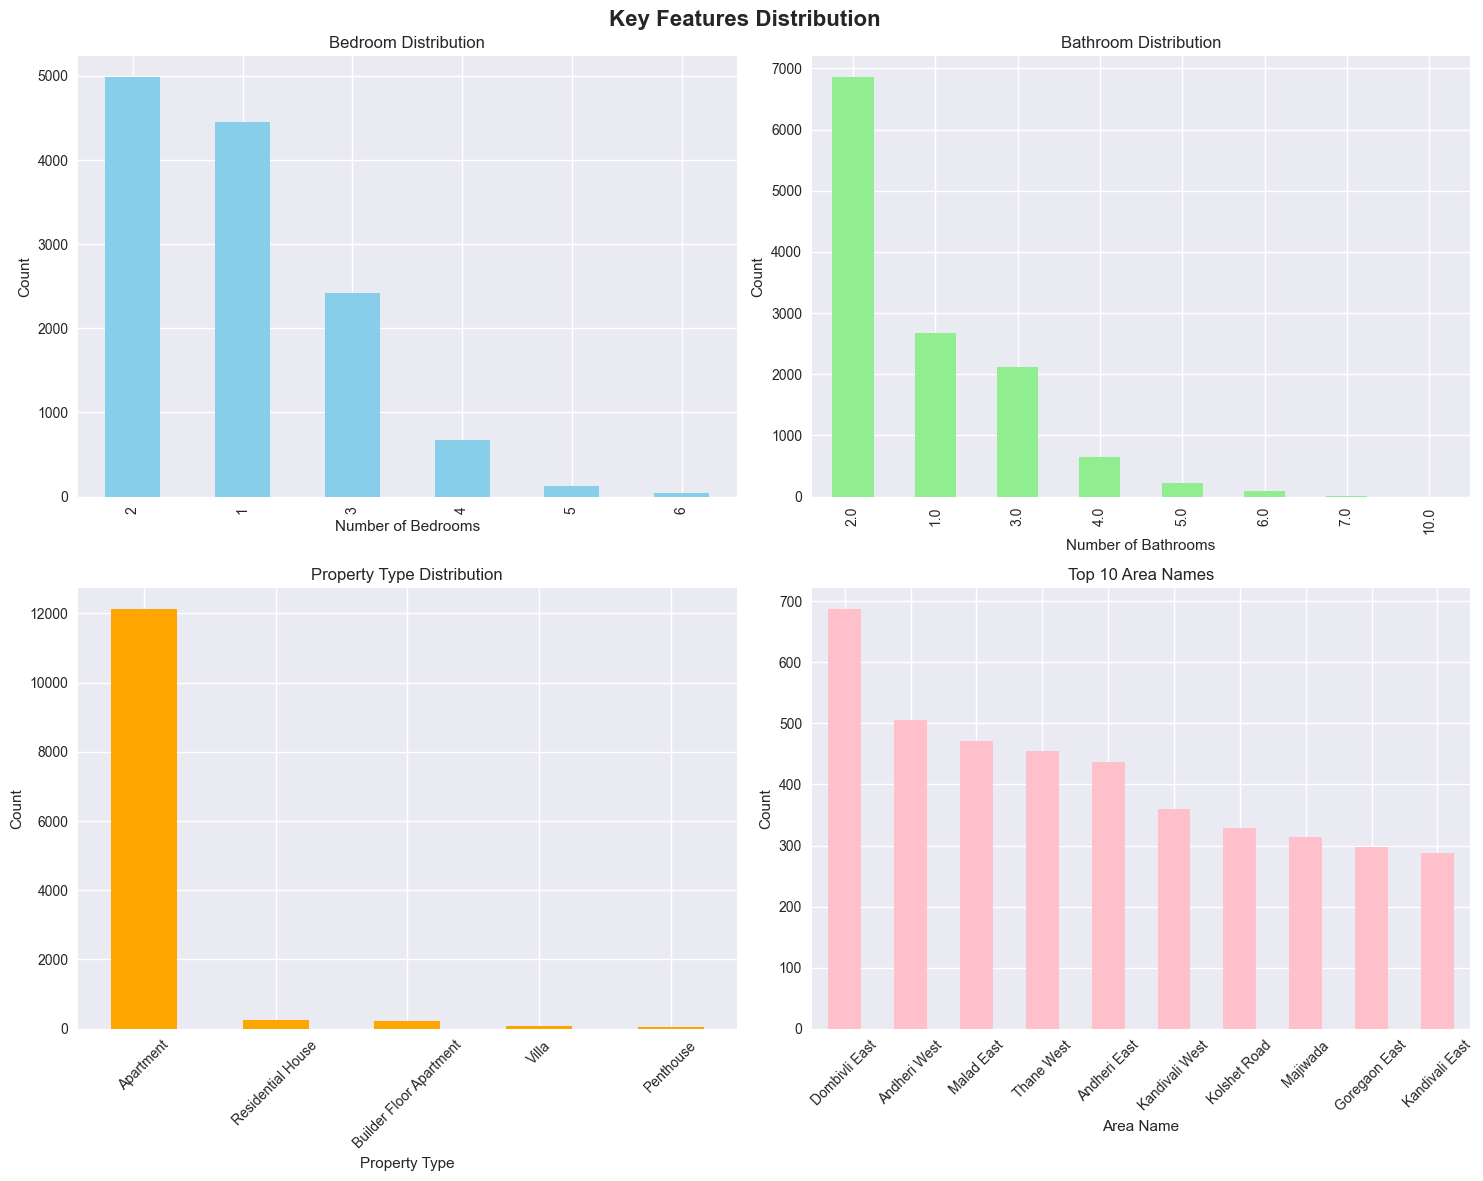

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Key Features Distribution', fontsize=16, fontweight='bold')

# Bedroom distribution
if 'bedroom' in df.columns:
    df['bedroom'].value_counts().head(10).plot(kind='bar', ax=axes[0,0], color='skyblue')
    axes[0,0].set_title('Bedroom Distribution')
    axes[0,0].set_xlabel('Number of Bedrooms')
    axes[0,0].set_ylabel('Count')

# Bathroom distribution
if 'Bathroom' in df.columns:
    df['Bathroom'].value_counts().head(10).plot(kind='bar', ax=axes[0,1], color='lightgreen')
    axes[0,1].set_title('Bathroom Distribution')
    axes[0,1].set_xlabel('Number of Bathrooms')
    axes[0,1].set_ylabel('Count')

# Property Type distribution
if 'Type of Property' in df.columns:
    df['Type of Property'].value_counts().head(8).plot(kind='bar', ax=axes[1,0], color='orange')
    axes[1,0].set_title('Property Type Distribution')
    axes[1,0].set_xlabel('Property Type')
    axes[1,0].set_ylabel('Count')
    axes[1,0].tick_params(axis='x', rotation=45)

# Area Name distribution (top 10)
if 'Area Name' in df.columns:
    df['Area Name'].value_counts().head(10).plot(kind='bar', ax=axes[1,1], color='pink')
    axes[1,1].set_title('Top 10 Area Names')
    axes[1,1].set_xlabel('Area Name')
    axes[1,1].set_ylabel('Count')
    axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

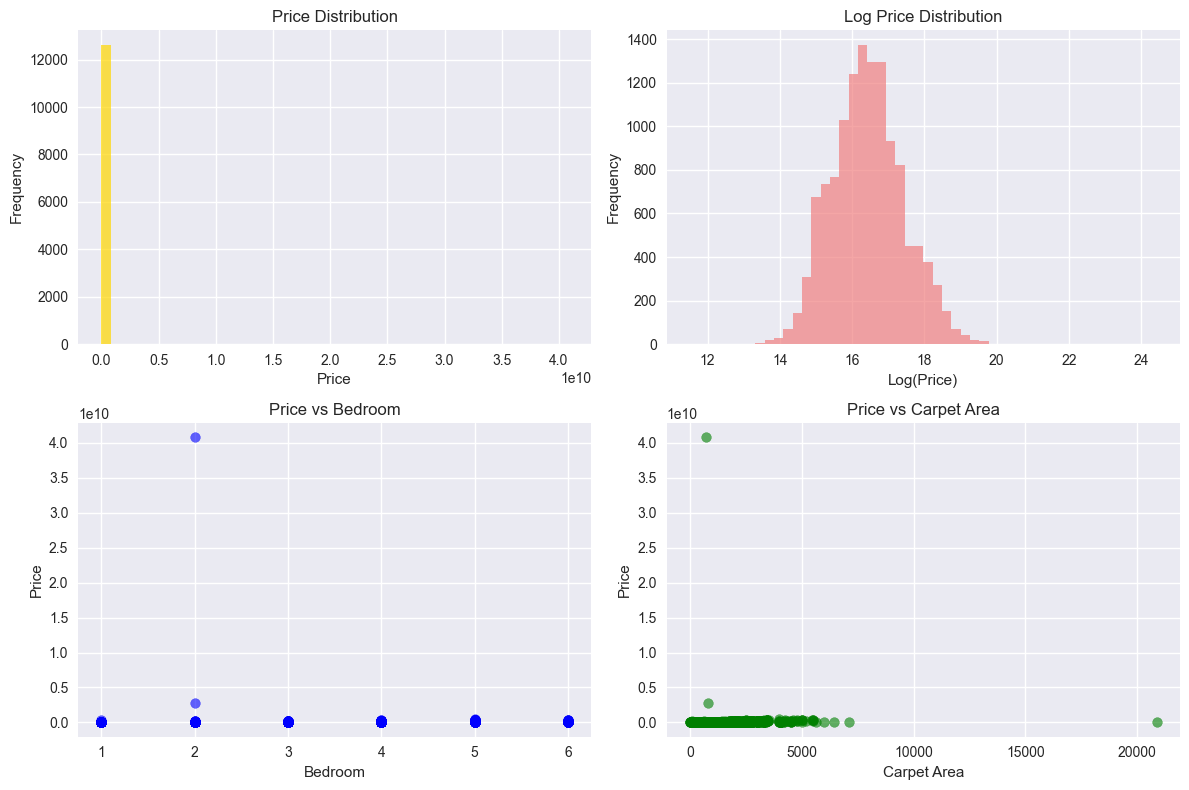


💰 Price Statistics:
count    1.260100e+04
mean     2.640261e+07
std      3.653648e+08
min      1.000000e+05
25%      7.000000e+06
50%      1.350000e+07
75%      2.550000e+07
max      4.080000e+10
Name: Price_numeric, dtype: float64


In [13]:
if 'Price' in df.columns:
    # Convert price to numeric if possible
    try:
        df['Price_numeric'] = pd.to_numeric(df['Price'], errors='coerce')
        
        plt.figure(figsize=(12, 8))
        
        # Price distribution
        plt.subplot(2, 2, 1)
        plt.hist(df['Price_numeric'].dropna(), bins=50, color='gold', alpha=0.7)
        plt.title('Price Distribution')
        plt.xlabel('Price')
        plt.ylabel('Frequency')
        
        # Log price distribution (for better visualization)
        plt.subplot(2, 2, 2)
        log_prices = np.log1p(df['Price_numeric'].dropna())
        plt.hist(log_prices, bins=50, color='lightcoral', alpha=0.7)
        plt.title('Log Price Distribution')
        plt.xlabel('Log(Price)')
        plt.ylabel('Frequency')
        
        # Price vs Bedroom
        if 'bedroom' in df.columns:
            plt.subplot(2, 2, 3)
            df_clean = df.dropna(subset=['Price_numeric', 'bedroom'])
            plt.scatter(df_clean['bedroom'], df_clean['Price_numeric'], alpha=0.6, color='blue')
            plt.title('Price vs Bedroom')
            plt.xlabel('Bedroom')
            plt.ylabel('Price')
        
        # Price vs Carpet Area
        if 'Carpet Area' in df.columns:
            plt.subplot(2, 2, 4)
            df_clean = df.dropna(subset=['Price_numeric', 'Carpet Area'])
            plt.scatter(df_clean['Carpet Area'], df_clean['Price_numeric'], alpha=0.6, color='green')
            plt.title('Price vs Carpet Area')
            plt.xlabel('Carpet Area')
            plt.ylabel('Price')
        
        plt.tight_layout()
        plt.show()
        
        print(f"\n💰 Price Statistics:")
        print(df['Price_numeric'].describe())
        
    except Exception as e:
        print(f"❌ Error in price analysis: {e}")


## DATA ANALYSIS

In [14]:
column_analysis = []

for col in df.columns:
    col_info = {
        'Column_Name': col,
        'Data_Type': str(df[col].dtype),
        'Total_Values': len(df),
        'Non_Null_Count': df[col].count(),
        'Missing_Count': df[col].isnull().sum(),
        'Missing_Percentage': round((df[col].isnull().sum() / len(df)) * 100, 2),
        'Unique_Values': df[col].nunique(),
        'Sample_Values': str(df[col].dropna().head(3).tolist())[:100] + "..." if len(str(df[col].dropna().head(3).tolist())) > 100 else str(df[col].dropna().head(3).tolist())
    }
    column_analysis.append(col_info)

# Convert to DataFrame for better display
column_df = pd.DataFrame(column_analysis)

print(f"📊 Total Columns: {len(column_df)}")
print(f"📊 Columns with Missing Values: {len(column_df[column_df['Missing_Count'] > 0])}")


📊 Total Columns: 146
📊 Columns with Missing Values: 42


### Solving Null Values

In [15]:
# Convert to DataFrame for better display
column_df = pd.DataFrame(column_analysis)

print(f"📊 Total Columns: {len(column_df)}")
print(f"📊 Columns with Missing Values: {len(column_df[column_df['Missing_Count'] > 0])}")

print("\n" + "="*70)
print("📋 COLUMNS WITH >50% MISSING VALUES (Candidates for Dropping)")
print("="*70)

high_missing = column_df[column_df['Missing_Percentage'] > 50].sort_values('Missing_Percentage', ascending=False)
print(f"🚨 Columns with >50% missing values: {len(high_missing)}")
print(high_missing[['Column_Name', 'Missing_Percentage', 'Data_Type', 'Sample_Values']].head(15))

print("\n" + "="*70)
print("📋 COLUMNS WITH <50% MISSING VALUES (Candidates for Imputation)")
print("="*70)

low_missing = column_df[(column_df['Missing_Percentage'] > 0) & (column_df['Missing_Percentage'] <= 50)].sort_values('Missing_Percentage', ascending=False)
print(f"⚠️ Columns with <50% missing values: {len(low_missing)}")
print(low_missing[['Column_Name', 'Missing_Percentage', 'Data_Type', 'Sample_Values']].head(15))

print("\n" + "="*70)
print("📋 PERFECT COLUMNS (No Missing Values)")
print("="*70)

perfect_cols = column_df[column_df['Missing_Percentage'] == 0]
print(f"✅ Perfect columns: {len(perfect_cols)}")
print(perfect_cols[['Column_Name', 'Data_Type', 'Unique_Values']].head(20))

print("\n" + "="*70)
print("📋 AMENITIES COLUMNS IDENTIFICATION")
print("="*70)

# Identify amenities columns (boolean/yes-no type columns)
amenities_cols = []
for col in df.columns:
    if df[col].dtype == 'int64' and df[col].nunique() <= 3:
        unique_vals = df[col].dropna().unique()
        if set(unique_vals).issubset({0, 1}) or set(unique_vals).issubset({0, 1, np.nan}):
            amenities_cols.append(col)

print(f"🏊 Amenities columns identified: {len(amenities_cols)}")
print("Amenities columns:")
for i, col in enumerate(amenities_cols, 1):
    print(f"{i:2d}. {col}")

📊 Total Columns: 146
📊 Columns with Missing Values: 42

📋 COLUMNS WITH >50% MISSING VALUES (Candidates for Dropping)
🚨 Columns with >50% missing values: 12
                  Column_Name  Missing_Percentage Data_Type  \
144               Pantry Type               99.49    object   
142  Land Area / Covered Area               99.34   float64   
143            Land Area Unit               99.32   float64   
140             Possession By               98.14    object   
141                  NRI Pref               84.10    object   
49                       Rera               81.28    object   
2    Availability Starts From               75.70    object   
21        Property Uniqueness               63.26    object   
48                  balconies               54.58   float64   
7             Units Available               51.64   float64   
6     Approved Authority Name               51.57    object   
13        Maintenance Charges               50.47   float64   

                        

### Understanding Key Features

In [16]:
key_features = ['Price', 'bedroom', 'Bathroom', 'Carpet Area', 'Area Name', 'Type of Property', 'furnished Type', 'Developer']
for feature in key_features:
    if feature in df.columns:
        print(f"\n🔑 {feature}:")
        print(f"   Data Type: {df[feature].dtype}")
        print(f"   Missing: {df[feature].isnull().sum()} ({round((df[feature].isnull().sum()/len(df))*100, 2)}%)")
        print(f"   Unique Values: {df[feature].nunique()}")
        if df[feature].dtype in ['object', 'category']:
            print(f"   Top 5 Values: {df[feature].value_counts().head().to_dict()}")
        else:
            print(f"   Range: {df[feature].min()} to {df[feature].max()}")
            print(f"   Mean: {df[feature].mean():.2f}")
            print(f"   Median: {df[feature].median():.2f}")


🔑 Price:
   Data Type: float64
   Missing: 84 (0.66%)
   Unique Values: 1251
   Range: 100000.0 to 40800000001.0
   Mean: 26402614.49
   Median: 13500000.00

🔑 bedroom:
   Data Type: int64
   Missing: 0 (0.0%)
   Unique Values: 6
   Range: 1 to 6
   Mean: 1.99
   Median: 2.00

🔑 Bathroom:
   Data Type: float64
   Missing: 69 (0.54%)
   Unique Values: 8
   Range: 1.0 to 10.0
   Mean: 2.14
   Median: 2.00

🔑 Carpet Area:
   Data Type: float64
   Missing: 2552 (20.12%)
   Unique Values: 1186
   Range: 2.0 to 20870.0
   Mean: 819.20
   Median: 671.00

🔑 Area Name:
   Data Type: object
   Missing: 0 (0.0%)
   Unique Values: 357
   Top 5 Values: {'Dombivli East': 687, 'Andheri West': 505, 'Malad East': 472, 'Thane West': 455, 'Andheri East': 437}

🔑 Type of Property:
   Data Type: object
   Missing: 0 (0.0%)
   Unique Values: 5
   Top 5 Values: {'Apartment': 12119, 'Residential House': 244, 'Builder Floor Apartment': 205, 'Villa': 79, 'Penthouse': 38}

🔑 furnished Type:
   Data Type: object

### Since we got alot of amenities we want to compare WITH PRICES

In [17]:
amenities_analysis = []

for col in amenities_cols:
    if col in df.columns:
        total_properties = df[col].count()
        properties_with_amenity = df[df[col] == 1].shape[0]
        percentage = (properties_with_amenity / total_properties) * 100 if total_properties > 0 else 0
        
        amenities_analysis.append({
            'Amenity': col,
            'Total_Properties': total_properties,
            'Properties_With_Amenity': properties_with_amenity,
            'Percentage': round(percentage, 2)
        })

amenities_df = pd.DataFrame(amenities_analysis)
amenities_df = amenities_df.sort_values('Percentage', ascending=False)

print("Top 20 Most Common Amenities:")
print(amenities_df.head(20))

print("\nBottom 20 Least Common Amenities:")
print(amenities_df.tail(20))

print("\n" + "="*70)
print("�� PRICE vs AMENITIES CORRELATION")
print("="*70)

# Analyze price correlation with amenities
price_amenities_corr = []

for col in amenities_cols:
    if col in df.columns:
        # Calculate correlation between price and amenity
        correlation = df[col].corr(df['Price'])
        
        # Calculate average price for properties with vs without amenity
        with_amenity = df[df[col] == 1]['Price'].mean()
        without_amenity = df[df[col] == 0]['Price'].mean()
        
        price_amenities_corr.append({
            'Amenity': col,
            'Correlation_with_Price': round(correlation, 4),
            'Avg_Price_With_Amenity': round(with_amenity, 0) if not pd.isna(with_amenity) else 0,
            'Avg_Price_Without_Amenity': round(without_amenity, 0) if not pd.isna(without_amenity) else 0,
            'Price_Difference': round(with_amenity - without_amenity, 0) if not pd.isna(with_amenity) and not pd.isna(without_amenity) else 0
        })

corr_df = pd.DataFrame(price_amenities_corr)
corr_df = corr_df.sort_values('Correlation_with_Price', ascending=False)

print("Top 15 Amenities with Highest Price Correlation:")
print(corr_df.head(15))

print("\nTop 15 Amenities that Increase Price Most:")
price_diff_df = corr_df.sort_values('Price_Difference', ascending=False)
print(price_diff_df.head(15))

Top 20 Most Common Amenities:
                        Amenity  Total_Properties  Properties_With_Amenity  \
2                          Lift             12685                     9299   
9                      Security             12685                     9164   
8                     Parking.1             12685                     8472   
7                          Park             12685                     8278   
17            Maintenance Staff             12685                     8206   
1                 Power Back Up             12685                     8179   
10                Water Storage             12685                     8172   
15              Visitor Parking             12685                     8080   
12             Vaastu Compliant             12685                     8075   
16            Intercom Facility             12685                     8032   
18               Waste Disposal             12685                     8009   
6                     Gymnasium   

### AREA-WISE LUXURY ANALYSIS

In [18]:
if 'Area Name' in df.columns:
    # Find areas with highest average prices
    area_prices = df.groupby('Area Name')['Price'].agg(['mean', 'count', 'std']).reset_index()
    area_prices = area_prices.sort_values('mean', ascending=False)
    
    print("Top 15 Most Expensive Areas:")
    print(area_prices.head(15))
    
    print("\nBottom 15 Most Affordable Areas:")
    print(area_prices.tail(15))

print("\n" + "="*70)
print("📊 FURNISHED vs UNFURNISHED PRICE ANALYSIS")
print("="*70)

if 'furnished Type' in df.columns:
    furnished_analysis = df.groupby('furnished Type')['Price'].agg(['mean', 'count', 'std']).reset_index()
    print("Price Analysis by Furnished Type:")
    print(furnished_analysis)

Top 15 Most Expensive Areas:
                                  Area Name          mean  count           std
300                            Shivaji Park  1.341647e+09     32  7.200452e+09
68                       Churchgate station  1.400000e+08      1           NaN
206                            Marine Drive  1.189483e+08     29  7.841480e+07
1                          AP Narayan Chowk  1.050000e+08      1           NaN
257                              Prabhadevi  1.041518e+08    217  8.140809e+07
311                       Sundervan Complex  9.500000e+07      1           NaN
263                              RTO Colony  9.385000e+07      4  7.733341e+07
237                               North Ave  8.375000e+07      4  6.597032e+07
157                              Khar Danda  8.350000e+07      7  4.976947e+07
67                               Churchgate  8.266667e+07     18  2.937636e+07
118                           Gulmohar Road  8.104800e+07     25  4.391248e+07
45                     

## PREPROCESSING

### Handling null values and Outliers

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')

print("Loading dataset...")
df = pd.read_csv('properties.csv', low_memory=False)
print(f"✅ Original dataset shape: {df.shape}")


# Create a copy for cleaning
df_clean = df.copy()

# Get 99th percentile price
p99_price = df_clean['Price'].quantile(0.99)
print(f"💰 99th percentile price: ₹{p99_price:,.0f}")

# Identify outliers by property type
outliers_99 = df_clean[df_clean['Price'] > p99_price]
print(f"\n🔍 Properties above 99th percentile: {len(outliers_99)}")

print("\n📊 Outlier analysis by property type:")
outlier_by_type = outliers_99['Type of Property'].value_counts()
print(outlier_by_type)

# Smart outlier handling: Cap only apartments, keep luxury properties
apartments_to_cap = df_clean[(df_clean['Type of Property'] == 'Apartment') & (df_clean['Price'] > p99_price)]
luxury_properties = df_clean[(df_clean['Type of Property'].isin(['Villa', 'Penthouse'])) & (df_clean['Price'] > p99_price)]

print(f"\n Apartments to cap: {len(apartments_to_cap)}")
print(f"🏰 Luxury properties to keep: {len(luxury_properties)}")

# Cap apartment prices at 99th percentile
df_clean.loc[(df_clean['Type of Property'] == 'Apartment') & (df_clean['Price'] > p99_price), 'Price'] = p99_price

print(f"\n✅ Outlier handling completed!")
print(f"�� New price range: ₹{df_clean['Price'].min():,.0f} to ₹{df_clean['Price'].max():,.0f}")


# Identify columns to drop (>50% missing)
columns_to_drop = []
for col in df_clean.columns:
    missing_pct = (df_clean[col].isnull().sum() / len(df_clean)) * 100
    if missing_pct > 50:
        columns_to_drop.append(col)

print(f"🚨 Columns with >50% missing values: {len(columns_to_drop)}")
print("Columns to drop:")
for i, col in enumerate(columns_to_drop, 1):
    missing_pct = (df_clean[col].isnull().sum() / len(df_clean)) * 100
    print(f"{i:2d}. {col} ({missing_pct:.1f}% missing)")

# Additional columns to drop based on analysis
additional_drops = ['Developer', 'Price (English)']  # 44% missing and useless
columns_to_drop.extend(additional_drops)

print(f"\n➕ Additional columns to drop: {additional_drops}")

# Drop columns
df_clean = df_clean.drop(columns=columns_to_drop)
print(f"✅ Dropped {len(columns_to_drop)} columns")
print(f" New dataset shape: {df_clean.shape}")

Loading dataset...
✅ Original dataset shape: (12685, 145)
💰 99th percentile price: ₹145,000,000

🔍 Properties above 99th percentile: 124

📊 Outlier analysis by property type:
Type of Property
Apartment                  109
Villa                        7
Penthouse                    5
Residential House            2
Builder Floor Apartment      1
Name: count, dtype: int64

 Apartments to cap: 109
🏰 Luxury properties to keep: 12

✅ Outlier handling completed!
�� New price range: ₹100,000 to ₹370,000,000
🚨 Columns with >50% missing values: 12
Columns to drop:
 1. Availability Starts From (75.7% missing)
 2. Approved Authority Name (51.6% missing)
 3. Units Available (51.6% missing)
 4. Maintenance Charges (50.5% missing)
 5. Property Uniqueness (63.3% missing)
 6. balconies (54.6% missing)
 7. Rera (81.3% missing)
 8. Possession By (98.1% missing)
 9. NRI Pref (84.1% missing)
10. Land Area / Covered Area (99.3% missing)
11. Land Area Unit (99.3% missing)
12. Pantry Type (99.5% missing)

➕ 

### Feature Engineering

In [21]:
# 1. Create bedroom-bathroom ratio
print("�� Creating bedroom-bathroom ratio...")
df_clean['bedroom_bathroom_ratio'] = df_clean['bedroom'] / df_clean['Bathroom']
print(f"✅ Bedroom-bathroom ratio created")

# 2. Create price per sq ft
print("\n�� Creating price per sq ft...")
df_clean['price_per_sqft'] = df_clean['Price'] / df_clean['Carpet Area']
print(f"✅ Price per sq ft created")

# 3. Create amenities categories based on price correlation analysis
print("\n�� Creating amenities categories...")

# Define amenities categories based on our analysis
basic_amenities = ['Lift', 'Security', 'Parking.1', 'Water Storage', 'Maintenance Staff', 
                   'Power Back Up', 'Visitor Parking', 'Intercom Facility', 'Waste Disposal']

standard_amenities = ['Gymnasium', 'Swimming Pool', 'Club House', 'Rain Water Harvesting',
                      'Laundry Service', 'Internet/Wi-Fi Connectivity', 'DTH Television Facility',
                      'RO Water System', 'Jogging and Strolling Track']

premium_amenities = ['Private Terrace/Garden', 'Air Conditioned', 'Banquet Hall', 'Bar/Lounge',
                     'Cafeteria/Food Court', 'Conference Room', 'Piped Gas', 'Outdoor Tennis Courts',
                     'Modular Kitchen', 'Private Garage']

luxury_amenities = ['Sea facing', 'Skydeck', 'Sky Villa', 'Wine Cellar', 'Helipad', 'Private pool ',
                    'Private Jaccuzi', 'Mini Cinema Theatre', 'Golf Course', 'Infinity Swimming Pool',
                    'Pool with temperature control ', 'Marble flooring', 'Well Furnished']

# Create category scores
df_clean['basic_amenities_score'] = df_clean[basic_amenities].sum(axis=1)
df_clean['standard_amenities_score'] = df_clean[standard_amenities].sum(axis=1)
df_clean['premium_amenities_score'] = df_clean[premium_amenities].sum(axis=1)
df_clean['luxury_amenities_score'] = df_clean[luxury_amenities].sum(axis=1)

# Create total amenities score
df_clean['total_amenities_score'] = (df_clean['basic_amenities_score'] + 
                                    df_clean['standard_amenities_score'] + 
                                    df_clean['premium_amenities_score'] + 
                                    df_clean['luxury_amenities_score'])

print(f"✅ Amenities categories created:")
print(f"   - Basic amenities score: {df_clean['basic_amenities_score'].mean():.1f} avg")
print(f"   - Standard amenities score: {df_clean['standard_amenities_score'].mean():.1f} avg")
print(f"   - Premium amenities score: {df_clean['premium_amenities_score'].mean():.1f} avg")
print(f"   - Luxury amenities score: {df_clean['luxury_amenities_score'].mean():.1f} avg")

# 4. Create property type encoding
print("\n��️ Creating property type encoding...")
property_type_mapping = {
    'Apartment': 1,
    'Builder Floor Apartment': 2,
    'Residential House': 3,
    'Villa': 4,
    'Penthouse': 5
}
df_clean['property_type_encoded'] = df_clean['Type of Property'].map(property_type_mapping)

# 5. Create furnished type encoding
print("�� Creating furnished type encoding...")
furnished_mapping = {
    'Unfurnished': 0,
    'Semi-Furnished': 1,
    'Furnished': 2
}
df_clean['furnished_encoded'] = df_clean['furnished Type'].map(furnished_mapping)


�� Creating bedroom-bathroom ratio...
✅ Bedroom-bathroom ratio created

�� Creating price per sq ft...
✅ Price per sq ft created

�� Creating amenities categories...
✅ Amenities categories created:
   - Basic amenities score: 6.0 avg
   - Standard amenities score: 5.4 avg
   - Premium amenities score: 5.7 avg
   - Luxury amenities score: 7.0 avg

��️ Creating property type encoding...
�� Creating furnished type encoding...


In [22]:
remaining_missing = df_clean.isnull().sum()
remaining_missing = remaining_missing[remaining_missing > 0].sort_values(ascending=False)

print(f"📊 Columns with remaining missing values: {len(remaining_missing)}")
print("\nMissing values summary:")
for col, missing_count in remaining_missing.head(10).items():
    missing_pct = (missing_count / len(df_clean)) * 100
    print(f"   {col}: {missing_count} ({missing_pct:.1f}%)")

# Intelligent imputation strategy
print("\n🧠 Applying intelligent imputation...")

# For numerical columns
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns
numerical_imputer = SimpleImputer(strategy='median')
df_clean[numerical_cols] = numerical_imputer.fit_transform(df_clean[numerical_cols])

# For categorical columns
categorical_cols = df_clean.select_dtypes(include=['object']).columns
categorical_imputer = SimpleImputer(strategy='most_frequent')
df_clean[categorical_cols] = categorical_imputer.fit_transform(df_clean[categorical_cols])

print("✅ Missing values imputed!")


📊 Columns with remaining missing values: 31

Missing values summary:
   Parking: 6159 (48.6%)
   Maintenance Type: 5613 (44.2%)
   Electricity Status: 5425 (42.8%)
   Water Status: 5396 (42.5%)
   Booking Amount: 4984 (39.3%)
   Property Lifespan: 4812 (37.9%)
   Landmark: 4644 (36.6%)
   Flooring Type: 4534 (35.7%)
   Project Name: 4531 (35.7%)
   Amenities Facing: 4099 (32.3%)

🧠 Applying intelligent imputation...
✅ Missing values imputed!


In [23]:
print(f"📊 Final dataset shape: {df_clean.shape}")
print(f"�� Price range: ₹{df_clean['Price'].min():,.0f} to ₹{df_clean['Price'].max():,.0f}")
print(f"�� Bedroom range: {df_clean['bedroom'].min()} to {df_clean['bedroom'].max()}")
print(f"🚿 Bathroom range: {df_clean['Bathroom'].min():.1f} to {df_clean['Bathroom'].max():.1f}")

# Check for any remaining missing values
final_missing = df_clean.isnull().sum().sum()
print(f"✅ Remaining missing values: {final_missing}")

print("\n" + "="*70)
print("📈 FEATURE ENGINEERING RESULTS")
print("="*70)

# Show new features statistics
new_features = ['bedroom_bathroom_ratio', 'price_per_sqft', 'basic_amenities_score', 
                'standard_amenities_score', 'premium_amenities_score', 'luxury_amenities_score',
                'total_amenities_score']

print("📊 New engineered features:")
for feature in new_features:
    if feature in df_clean.columns:
        print(f"   {feature}:")
        print(f"      Mean: {df_clean[feature].mean():.2f}")
        print(f"      Median: {df_clean[feature].median():.2f}")
        print(f"      Range: {df_clean[feature].min():.2f} to {df_clean[feature].max():.2f}")

print("\n" + "="*70)
print("�� CORRELATION WITH TARGET")
print("="*70)

# Check correlation of new features with price
correlations = []
for feature in new_features:
    if feature in df_clean.columns:
        corr = df_clean[feature].corr(df_clean['Price'])
        correlations.append((feature, corr))

correlations.sort(key=lambda x: abs(x[1]), reverse=True)
print("📊 Correlation with Price (absolute values):")
for feature, corr in correlations:
    print(f"   {feature}: {corr:.4f}")

print("\n" + "="*70)
print("✅ STEP 2 COMPLETED!")
print("="*70)
print("📋 Next Steps:")
print("1. Analyze the cleaned dataset")
print("2. Share results for Step 3: Model Building")
print("3. We'll create the machine learning model!")

# Save cleaned dataset
df_clean.to_csv('cleaned_properties.csv', index=False)
print("\n💾 Cleaned dataset saved as 'cleaned_properties.csv'")

📊 Final dataset shape: (12685, 140)
�� Price range: ₹100,000 to ₹370,000,000
�� Bedroom range: 1.0 to 6.0
🚿 Bathroom range: 1.0 to 10.0
✅ Remaining missing values: 0

📈 FEATURE ENGINEERING RESULTS
📊 New engineered features:
   bedroom_bathroom_ratio:
      Mean: 0.94
      Median: 1.00
      Range: 0.33 to 4.00
   price_per_sqft:
      Mean: 26651.24
      Median: 23043.05
      Range: 16.67 to 6550000.00
   basic_amenities_score:
      Mean: 5.96
      Median: 9.00
      Range: 0.00 to 9.00
   standard_amenities_score:
      Mean: 5.43
      Median: 9.00
      Range: 0.00 to 9.00
   premium_amenities_score:
      Mean: 5.68
      Median: 10.00
      Range: 0.00 to 10.00
   luxury_amenities_score:
      Mean: 6.98
      Median: 13.00
      Range: 0.00 to 13.00
   total_amenities_score:
      Mean: 24.05
      Median: 41.00
      Range: 0.00 to 41.00

�� CORRELATION WITH TARGET
📊 Correlation with Price (absolute values):
   total_amenities_score: 0.2663
   premium_amenities_score: 0.264

## CLEAN DATASET ANALYSIS

In [25]:
print("🔍 QUICK DEEP ANALYSIS BEFORE STEP 3")
print("="*70)

# Load cleaned dataset
df_clean = pd.read_csv('cleaned_properties.csv')

print("💰 PRICE PER SQ FT OUTLIER ANALYSIS")
print("="*70)

# Analyze price per sq ft outliers
price_per_sqft = df_clean['price_per_sqft']
p99_price_sqft = price_per_sqft.quantile(0.99)
p95_price_sqft = price_per_sqft.quantile(0.95)

print(f"📊 Price per sq ft statistics:")
print(f"   Mean: ₹{price_per_sqft.mean():,.0f}")
print(f"   Median: ₹{price_per_sqft.median():,.0f}")
print(f"   95th percentile: ₹{p95_price_sqft:,.0f}")
print(f"   99th percentile: ₹{p99_price_sqft:,.0f}")
print(f"   Max: ₹{price_per_sqft.max():,.0f}")

# Find extreme price per sq ft properties
extreme_price_sqft = df_clean[df_clean['price_per_sqft'] > p99_price_sqft]
print(f"\n🔍 Properties with extreme price per sq ft (>99th percentile): {len(extreme_price_sqft)}")

if len(extreme_price_sqft) > 0:
    print("\n📊 Extreme price per sq ft properties:")
    extreme_analysis = extreme_price_sqft[['Area Name', 'Type of Property', 'Price', 'Carpet Area', 'price_per_sqft']].head(10)
    print(extreme_analysis)

print("\n" + "="*70)
print("🏘️ AREA-WISE AMENITIES ANALYSIS")
print("="*70)

# Find areas with most luxury amenities
area_luxury = df_clean.groupby('Area Name')['luxury_amenities_score'].agg(['mean', 'count']).reset_index()
area_luxury = area_luxury[area_luxury['count'] >= 5].sort_values('mean', ascending=False)

print("🏆 Top 15 Areas with Most Luxury Amenities:")
print(area_luxury.head(15))

# Find areas with least luxury amenities
print("\n📉 Bottom 15 Areas with Least Luxury Amenities:")
print(area_luxury.tail(15))

print("\n" + "="*70)
print("🏠 PROPERTY TYPE vs AMENITIES ANALYSIS")
print("="*70)

# Analyze amenities by property type
property_amenities = df_clean.groupby('Type of Property').agg({
    'basic_amenities_score': 'mean',
    'standard_amenities_score': 'mean',
    'premium_amenities_score': 'mean',
    'luxury_amenities_score': 'mean',
    'total_amenities_score': 'mean',
    'Price': 'mean',
    'price_per_sqft': 'mean'
}).round(2)

print("📊 Amenities by Property Type:")
print(property_amenities)

print("\n" + "="*70)
print("🎯 AMENITIES COMBINATIONS ANALYSIS")
print("="*70)

# Find properties with high luxury amenities
high_luxury = df_clean[df_clean['luxury_amenities_score'] >= 10]
print(f"🏰 Properties with high luxury amenities (≥10): {len(high_luxury)}")

if len(high_luxury) > 0:
    print("\n📊 High luxury properties analysis:")
    luxury_analysis = high_luxury.groupby('Type of Property').agg({
        'Price': ['mean', 'count'],
        'luxury_amenities_score': 'mean',
        'Area Name': lambda x: x.mode().iloc[0] if len(x.mode()) > 0 else 'N/A'
    }).round(2)
    print(luxury_analysis)

# Find best amenities combinations
print("\n🔍 Best Amenities Combinations (Top 10 by Price):")
top_price_properties = df_clean.nlargest(10, 'Price')[['Area Name', 'Type of Property', 'Price', 
                                                      'basic_amenities_score', 'standard_amenities_score',
                                                      'premium_amenities_score', 'luxury_amenities_score',
                                                      'total_amenities_score']]
print(top_price_properties)

print("\n" + "="*70)
print("�� CORRELATION MATRIX ANALYSIS")
print("="*70)

# Create correlation matrix for key features
key_features = ['Price', 'bedroom', 'Bathroom', 'Carpet Area', 'price_per_sqft',
                'basic_amenities_score', 'standard_amenities_score', 'premium_amenities_score',
                'luxury_amenities_score', 'total_amenities_score', 'property_type_encoded',
                'furnished_encoded']

correlation_matrix = df_clean[key_features].corr()

print("📊 Key Features Correlation Matrix:")
print(correlation_matrix['Price'].sort_values(ascending=False))

print("\n" + "="*70)
print("�� FINAL INSIGHTS FOR MODEL BUILDING")
print("="*70)

print("📋 Key Insights:")
print("1. 🏆 Top features by correlation:")
price_correlations = correlation_matrix['Price'].sort_values(ascending=False)
for i, (feature, corr) in enumerate(price_correlations.head(8).items(), 1):
    print(f"   {i}. {feature}: {corr:.4f}")

print("\n2. 🏰 Luxury properties:")
luxury_count = len(df_clean[df_clean['Type of Property'].isin(['Villa', 'Penthouse'])])
print(f"   - Villa/Penthouse count: {luxury_count}")
print(f"   - Average luxury amenities: {df_clean[df_clean['Type of Property'].isin(['Villa', 'Penthouse'])]['luxury_amenities_score'].mean():.1f}")

print("\n3. 🏘️ Area diversity:")
print(f"   - Total areas: {df_clean['Area Name'].nunique()}")
print(f"   - Most expensive area: {df_clean.loc[df_clean['Price'].idxmax(), 'Area Name']}")
print(f"   - Average price: ₹{df_clean['Price'].mean():,.0f}")

print("\n4. 🎯 Model building strategy:")
print("   - Use all amenities scores (strong correlations)")
print("   - Include area name (categorical encoding needed)")
print("   - Consider property type and furnished status")
print("   - Price per sq ft might need outlier handling")


🔍 QUICK DEEP ANALYSIS BEFORE STEP 3
💰 PRICE PER SQ FT OUTLIER ANALYSIS
📊 Price per sq ft statistics:
   Mean: ₹26,651
   Median: ₹23,043
   95th percentile: ₹51,197
   99th percentile: ₹67,420
   Max: ₹6,550,000

🔍 Properties with extreme price per sq ft (>99th percentile): 127

📊 Extreme price per sq ft properties:
                      Area Name Type of Property        Price  Carpet Area  \
653             Jogeshwari East        Apartment  125000000.0       1740.0   
1469               Dahisar West        Apartment   32500000.0        116.0   
2351               Shivaji Park        Apartment  100000000.0       1350.0   
2380               Shivaji Park        Apartment  100000000.0       1350.0   
2397               Shivaji Park        Apartment  145000000.0        710.0   
2409  Prabodhankar Thakre Chowk        Apartment   36900000.0        500.0   
2422                 Dadar West        Penthouse  150000000.0       1870.0   
2459               Shivaji Park        Apartment   3750000

## MODEL BUILDING

In [26]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

print(" Loading cleaned dataset...")
df_clean = pd.read_csv('cleaned_properties.csv')
print(f"✅ Dataset loaded: {df_clean.shape}")

print("\n" + "="*70)
print("🎯 STEP 1: FEATURE SELECTION & PREPROCESSING")
print("="*70)

# Select features based on correlation analysis
numerical_features = ['bedroom', 'Bathroom', 'Carpet Area', 'price_per_sqft',
                     'basic_amenities_score', 'standard_amenities_score', 
                     'premium_amenities_score', 'luxury_amenities_score', 
                     'total_amenities_score', 'property_type_encoded', 'furnished_encoded']

categorical_features = ['Area Name']

print(f"�� Selected numerical features: {len(numerical_features)}")
print(f"📊 Selected categorical features: {len(categorical_features)}")

# Handle price per sq ft outliers (cap at 99th percentile)
price_per_sqft_p99 = df_clean['price_per_sqft'].quantile(0.99)
df_clean['price_per_sqft_capped'] = df_clean['price_per_sqft'].clip(upper=price_per_sqft_p99)

# Replace original price_per_sqft with capped version
numerical_features[numerical_features.index('price_per_sqft')] = 'price_per_sqft_capped'

print(f"✅ Price per sq ft outliers capped at ₹{price_per_sqft_p99:,.0f}")

 Loading cleaned dataset...
✅ Dataset loaded: (12685, 140)

🎯 STEP 1: FEATURE SELECTION & PREPROCESSING
�� Selected numerical features: 11
📊 Selected categorical features: 1
✅ Price per sq ft outliers capped at ₹67,420


In [27]:
print("\n" + "="*70)
print("🏘️ STEP 2: AREA NAME ENCODING")
print("="*70)

# Analyze area name distribution
area_counts = df_clean['Area Name'].value_counts()
print(f"�� Total unique areas: {len(area_counts)}")
print(f"📊 Areas with <5 properties: {len(area_counts[area_counts < 5])}")

# Create area encoding strategy
print("\n🏆 Top 20 areas by property count:")
print(area_counts.head(20))

# Strategy: Keep top 50 areas, group others as 'Other'
top_50_areas = area_counts.head(50).index.tolist()
df_clean['Area_Encoded'] = df_clean['Area Name'].apply(lambda x: x if x in top_50_areas else 'Other')

# Label encode the areas
le_area = LabelEncoder()
df_clean['Area_Encoded'] = le_area.fit_transform(df_clean['Area_Encoded'])

print(f"✅ Area encoding completed: {len(le_area.classes_)} unique areas")

# Add encoded area to numerical features
numerical_features.append('Area_Encoded')



🏘️ STEP 2: AREA NAME ENCODING
�� Total unique areas: 357
📊 Areas with <5 properties: 165

🏆 Top 20 areas by property count:
Area Name
Dombivli East     687
Andheri West      505
Malad East        472
Thane West        455
Andheri East      437
Kandivali West    360
Kolshet Road      328
Majiwada          314
Goregaon East     297
Kandivali East    288
Mira Road East    278
Virar West        251
Manpada           232
Prabhadevi        217
Kalyan West       207
Dahisar East      194
Balkum village    190
Santacruz West    190
Naigaon East      180
Dadar West        161
Name: count, dtype: int64
✅ Area encoding completed: 51 unique areas


In [28]:
print("\n" + "="*70)
print("�� STEP 3: FINAL FEATURE SET")
print("="*70)

# Create final feature set
X = df_clean[numerical_features]
y = df_clean['Price']

print(f"📊 Feature matrix shape: {X.shape}")
print(f"📊 Target vector shape: {y.shape}")

print("\n�� Final features:")
for i, feature in enumerate(numerical_features, 1):
    print(f"{i:2d}. {feature}")

# Check for any missing values
print(f"\n✅ Missing values in features: {X.isnull().sum().sum()}")
print(f"✅ Missing values in target: {y.isnull().sum()}")


�� STEP 3: FINAL FEATURE SET
📊 Feature matrix shape: (12685, 12)
📊 Target vector shape: (12685,)

�� Final features:
 1. bedroom
 2. Bathroom
 3. Carpet Area
 4. price_per_sqft_capped
 5. basic_amenities_score
 6. standard_amenities_score
 7. premium_amenities_score
 8. luxury_amenities_score
 9. total_amenities_score
10. property_type_encoded
11. furnished_encoded
12. Area_Encoded

✅ Missing values in features: 0
✅ Missing values in target: 0


In [29]:
print("\n" + "="*70)
print("STEP 4: DATA SPLITTING & SCALING")
print("="*70)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"📊 Training set: {X_train.shape}")
print(f"📊 Test set: {X_test.shape}")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Data scaled successfully!")


STEP 4: DATA SPLITTING & SCALING
📊 Training set: (10148, 12)
📊 Test set: (2537, 12)
✅ Data scaled successfully!


In [30]:
print("🤖 STEP 5: MODEL TRAINING & COMPARISON")
print("="*70)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42)
}

# Train and evaluate models
results = {}

for name, model in models.items():
    print(f"\n�� Training {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    results[name] = {
        'Model': model,
        'RMSE': rmse,
        'MAE': mae,
        'R2': r2,
        'CV_R2_Mean': cv_scores.mean(),
        'CV_R2_Std': cv_scores.std()
    }
    
    print(f"✅ {name} completed:")
    print(f"   RMSE: ₹{rmse:,.0f}")
    print(f"   MAE: ₹{mae:,.0f}")
    print(f"   R²: {r2:.4f}")
    print(f"   CV R²: {cv_scores.mean():.4f} (±{cv_scores.std():.4f})")

🤖 STEP 3.5: MODEL TRAINING & COMPARISON

�� Training Linear Regression...
✅ Linear Regression completed:
   RMSE: ₹10,144,819
   MAE: ₹6,482,778
   R²: 0.8452
   CV R²: 0.8006 (±0.0430)

�� Training Ridge Regression...
✅ Ridge Regression completed:
   RMSE: ₹10,144,788
   MAE: ₹6,482,551
   R²: 0.8452
   CV R²: 0.8006 (±0.0430)

�� Training Lasso Regression...
✅ Lasso Regression completed:
   RMSE: ₹10,144,819
   MAE: ₹6,482,778
   R²: 0.8452
   CV R²: 0.8006 (±0.0430)

�� Training Random Forest...
✅ Random Forest completed:
   RMSE: ₹4,660,111
   MAE: ₹1,184,666
   R²: 0.9673
   CV R²: 0.9060 (±0.0307)

�� Training XGBoost...
✅ XGBoost completed:
   RMSE: ₹4,692,464
   MAE: ₹1,523,997
   R²: 0.9669
   CV R²: 0.9005 (±0.0376)


In [31]:
print("📊 STEP 6: MODEL COMPARISON RESULTS")
print("="*70)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'RMSE': [results[name]['RMSE'] for name in results.keys()],
    'MAE': [results[name]['MAE'] for name in results.keys()],
    'R2': [results[name]['R2'] for name in results.keys()],
    'CV_R2_Mean': [results[name]['CV_R2_Mean'] for name in results.keys()],
    'CV_R2_Std': [results[name]['CV_R2_Std'] for name in results.keys()]
})

print("📊 Model Performance Comparison:")
print(comparison_df.sort_values('R2', ascending=False))

# Find best model
best_model_name = comparison_df.loc[comparison_df['R2'].idxmax(), 'Model']
best_model = results[best_model_name]['Model']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"📊 Best R² Score: {comparison_df['R2'].max():.4f}")

📊 STEP 6: MODEL COMPARISON RESULTS
📊 Model Performance Comparison:
               Model          RMSE           MAE        R2  CV_R2_Mean  \
3      Random Forest  4.660111e+06  1.184666e+06  0.967327    0.905979   
4            XGBoost  4.692464e+06  1.523997e+06  0.966871    0.900468   
1   Ridge Regression  1.014479e+07  6.482551e+06  0.845159    0.800588   
2   Lasso Regression  1.014482e+07  6.482778e+06  0.845158    0.800579   
0  Linear Regression  1.014482e+07  6.482778e+06  0.845158    0.800579   

   CV_R2_Std  
3   0.030701  
4   0.037556  
1   0.043007  
2   0.043026  
0   0.043026  

🏆 Best Model: Random Forest
📊 Best R² Score: 0.9673



🔍 STEP 7: FEATURE IMPORTANCE ANALYSIS
�� Feature Importance (Top 10):
                     Feature  Importance
2                Carpet Area    0.650887
3      price_per_sqft_capped    0.219319
0                    bedroom    0.056551
11              Area_Encoded    0.028141
1                   Bathroom    0.017289
10         furnished_encoded    0.013099
9      property_type_encoded    0.007663
8      total_amenities_score    0.002120
4      basic_amenities_score    0.001800
5   standard_amenities_score    0.001307


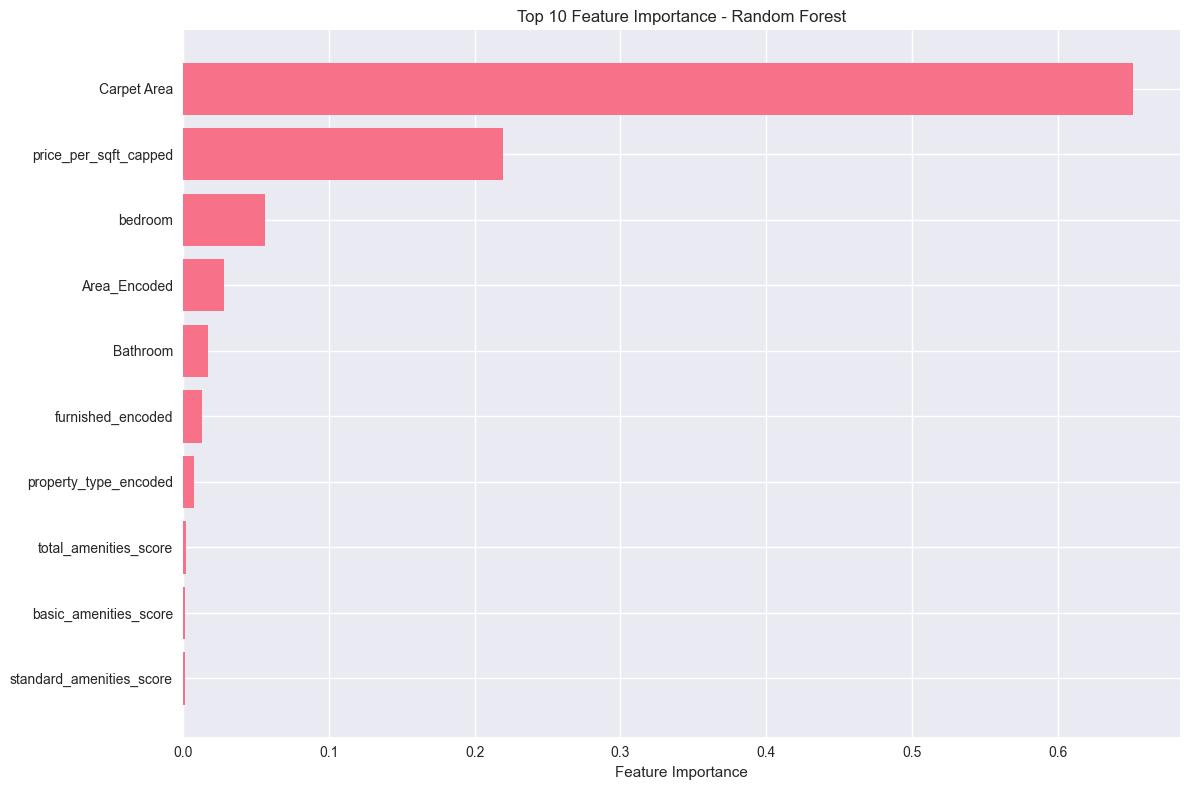

In [32]:
print("\n" + "="*70)
print("🔍 STEP 7: FEATURE IMPORTANCE ANALYSIS")
print("="*70)

# Feature importance for tree-based models
if hasattr(best_model, 'feature_importances_'):
    feature_importance = best_model.feature_importances_
    feature_names = numerical_features
    
    # Create feature importance DataFrame
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    }).sort_values('Importance', ascending=False)
    
    print("�� Feature Importance (Top 10):")
    print(importance_df.head(10))
    
    # Plot feature importance
    plt.figure(figsize=(12, 8))
    top_features = importance_df.head(10)
    plt.barh(range(len(top_features)), top_features['Importance'])
    plt.yticks(range(len(top_features)), top_features['Feature'])
    plt.xlabel('Feature Importance')
    plt.title(f'Top 10 Feature Importance - {best_model_name}')
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

elif hasattr(best_model, 'coef_'):
    # For linear models
    coefficients = best_model.coef_
    feature_names = numerical_features
    
    coef_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    print("🏆 Feature Coefficients (Top 10):")
    print(coef_df.head(10))



📈 STEP 3.8: PREDICTION ANALYSIS
📊 Prediction Analysis:
   Mean Absolute Error: ₹1,184,666
   Mean Error Percentage: 10.08%
   Predictions within 10% error: 2110 (83.2%)
   Predictions within 20% error: 2260 (89.1%)


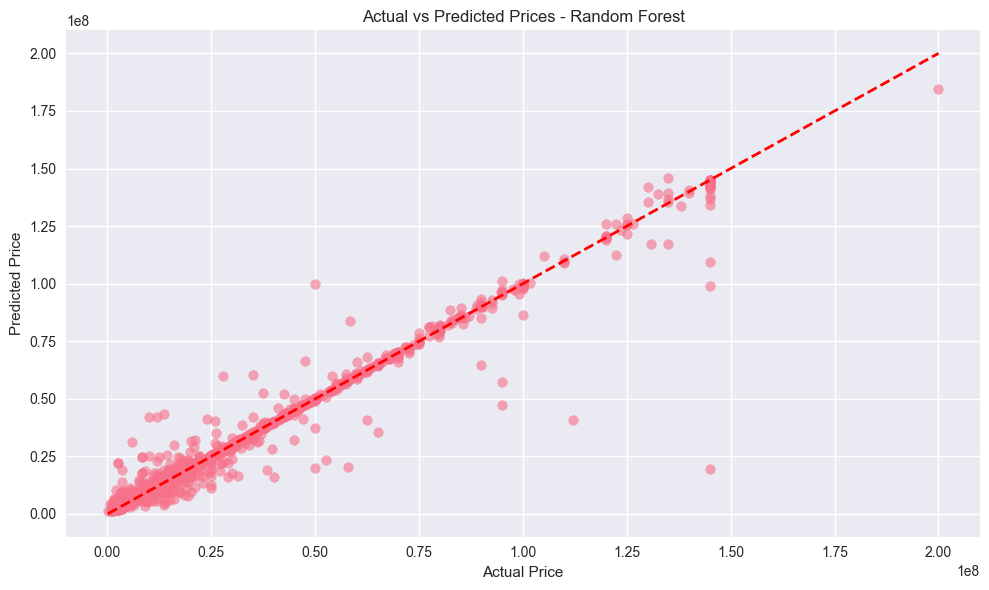

In [33]:
print("\n" + "="*70)
print("📈 STEP 3.8: PREDICTION ANALYSIS")
print("="*70)

# Get best model predictions
best_predictions = best_model.predict(X_test_scaled)

# Create prediction analysis
prediction_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': best_predictions,
    'Error': y_test - best_predictions,
    'Error_Percentage': ((y_test - best_predictions) / y_test) * 100
})

print("📊 Prediction Analysis:")
print(f"   Mean Absolute Error: ₹{prediction_df['Error'].abs().mean():,.0f}")
print(f"   Mean Error Percentage: {prediction_df['Error_Percentage'].abs().mean():.2f}%")
print(f"   Predictions within 10% error: {(prediction_df['Error_Percentage'].abs() <= 10).sum()} ({(prediction_df['Error_Percentage'].abs() <= 10).mean()*100:.1f}%)")
print(f"   Predictions within 20% error: {(prediction_df['Error_Percentage'].abs() <= 20).sum()} ({(prediction_df['Error_Percentage'].abs() <= 20).mean()*100:.1f}%)")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, best_predictions, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted Prices - {best_model_name}')
plt.tight_layout()
plt.show()


### MODEL SAVING

In [34]:
print("\n" + "="*70)
print("💾 STEP 9: MODEL SAVING")
print("="*70)

# Save the best model and preprocessing objects
import joblib

# Save model and preprocessing objects
joblib.dump(best_model, 'best_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le_area, 'area_encoder.pkl')

# Save feature names for later use
feature_info = {
    'numerical_features': numerical_features,
    'top_50_areas': top_50_areas,
    'area_encoder_classes': le_area.classes_.tolist()
}
joblib.dump(feature_info, 'feature_info.pkl')

print("✅ Model and preprocessing objects saved:")
print("   - best_model.pkl")
print("   - scaler.pkl")
print("   - area_encoder.pkl")
print("   - feature_info.pkl")


💾 STEP 9: MODEL SAVING
✅ Model and preprocessing objects saved:
   - best_model.pkl
   - scaler.pkl
   - area_encoder.pkl
   - feature_info.pkl
